# IFT 6758 - Homework 2

In [7]:
%load_ext autoreload
%autoreload 2

## Question 1

### a)
Begin by using the functions created in `q1.py` to make the data more informative and readable. Specifically, complete the following cells:

In [8]:
import pandas as pd
import numpy as np
import time
import json
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks")

# load data
df = pd.read_csv(r'C:\Users\AgeTeQ\Desktop\data\classes\DS\hw2-en\data\audio_segments.csv')

# function to count how many labels a row has
def count_labels(labels_str):
    if pd.isna(labels_str) or labels_str == "":
        return 0
    return len(labels_str.split(','))

# test the function
first_row = df.iloc[0][' positive_labels']
print("First row labels:", first_row)
print("Type:", type(first_row))
print("Count of labels:", count_labels(first_row))

df['label_count'] = df[' positive_labels'].apply(count_labels)

# load ontology file to convert IDs into readable names
start_time = time.time()

with open(r'C:\Users\AgeTeQ\Desktop\data\classes\DS\hw2-en\data\ontology.json', 'r') as f:
    ontology = json.load(f)

id_to_name = {}
for item in ontology:
    id_to_name[item['id']] = item['name']

def convert_ids(labels_str):
    if pd.isna(labels_str) or labels_str == "":
        return ""
    ids = labels_str.split(',')
    names = []
    for i in ids:
        if i in id_to_name:
            names.append(id_to_name[i])
        else:
            names.append(i) 
    return '|'.join(names)

df['label_names'] = df[' positive_labels'].apply(convert_ids)

end_time = time.time()
print(f"Conversion time: {end_time - start_time:.2f} sec")

# check results for first few rows
print("\nFirst few rows after processing:")
for i in range(5):
    print(f"Row {i}: {df.iloc[i]['label_count']} labels -> {df.iloc[i]['label_names']}")

print(df.head())

print("\nLabel count column info:")
print("Non-null values:", df['label_count'].notna().sum())
print("Data type:", df['label_count'].dtype)

# save cleaned data
df.to_csv('audio_segments_clean.csv', index=False)
print("\nData saved to audio_segments_clean.csv")


First row labels: /m/068hy,/m/07q6cd_,/m/0bt9lr,/m/0jbk
Type: <class 'str'>
Count of labels: 4
Conversion time: 0.05 sec

First few rows after processing:
Row 0: 4 labels -> Domestic animals, pets|Squeak|Dog|Animal
Row 1: 1 labels -> Hammer
Row 2: 1 labels -> Cough
Row 3: 4 labels -> Music|Speech|Female singing|Child singing
Row 4: 3 labels -> Chuckle, chortle|Belly laugh|Baby laughter
        # YTID   start_seconds   end_seconds  \
0  --4gqARaEJE             0.0          10.0   
1  --BfvyPmVMo            20.0          30.0   
2  --U7joUcTCo             0.0          10.0   
3  --i-y1v8Hy8             0.0           9.0   
4  -0BIyqJj9ZU            30.0          40.0   

                           positive_labels  label_count  \
0    /m/068hy,/m/07q6cd_,/m/0bt9lr,/m/0jbk            4   
1                                 /m/03l9g            1   
2                                /m/01b_21            1   
3  /m/04rlf,/m/09x0r,/t/dd00004,/t/dd00005            4   
4         /m/07rgt08,/m/07s

### b)

Next, using the clean DataFrame, complete the following cells to better understand the distribution of labels in the dataset. For each plot below, make sure to include appropriate **axis names** and a **title**.

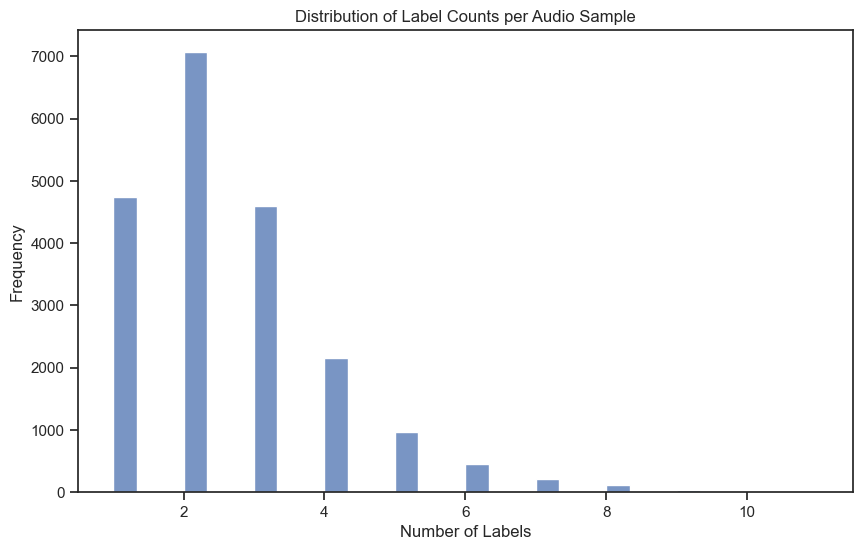

In [9]:
# Using seaborn, create a histogram of the label count of the samples in the DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='label_count', bins=30)
plt.title('Distribution of Label Counts per Audio Sample')
plt.xlabel('Number of Labels')
plt.ylabel('Frequency')
plt.show()

Follow the steps below to create a heatmap showing "correlation" between different labels. 
- Specifically, each cell of the heatmap should correspond to the probability that a sample with the corresponding row label also has the corresponding column label. 
- Just consider the labels ["Piano", "Classical music", "Speech", "Conversation", "Screaming"]. 

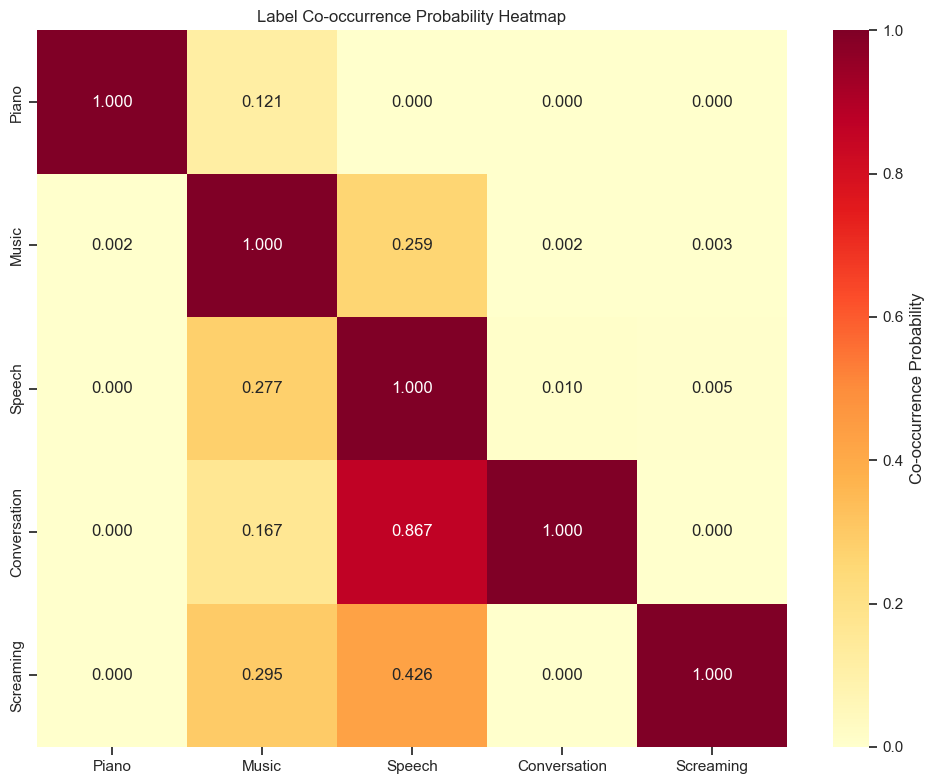

In [10]:
# Follow the steps below to create a heatmap showing "correlation" between different labels. 
# Specifically, each cell of the heatmap should correspond to the probability that a sample with the corresponding row label also has the corresponding column label. 
# Just consider the labels ["Piano", "Music", "Speech", "Conversation", "Screaming"]. 

labels = ["Piano", "Music", "Speech", "Conversation", "Screaming"]

# There are a couple ways to approach this, the way we recommend here is to first build a 2D grid where each
# value is the correlation value between the corresponding row/column using the functions created in q1.py.

# Define the function as it would be in q1.py
def get_correlation(labels: pd.Series, label_1: str, label_2: str) -> float:
    # Filter rows that contain label_1
    rows_with_label1 = labels[labels.str.contains(label_1, na=False)]
    
    # if there are no rows with label_1, then just return 0
    if len(rows_with_label1) == 0:
        return 0.0
    
    # now check how many of those rows also have label_2
    count_label2 = rows_with_label1.str.contains(label_2, na=False).sum()
    
    # return the fraction of rows that had both labels
    probability = count_label2 / len(rows_with_label1)
    return probability

# Create correlation matrix
correlation_matrix = np.zeros((len(labels), len(labels)))

for i, label1 in enumerate(labels):
    for j, label2 in enumerate(labels):
        correlation_matrix[i, j] = get_correlation(df['label_names'], label1, label2)

# Then using sns.heatmap, create the heatmap, taking advantage of xticklabels and yticklabels to set the label names
# as tick values

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            xticklabels=labels, 
            yticklabels=labels,
            annot=True, 
            fmt='.3f',
            cmap='YlOrRd',
            cbar_kws={'label': 'Co-occurrence Probability'})
plt.title('Label Co-occurrence Probability Heatmap')
plt.tight_layout()
plt.show()

## Question 2
Question 2 has no notebook component, just fill out the `q2.py` file.

## Question 3

Download the audio for the following labels using the function created in `q3.py`

In [11]:
from q3 import data_pipeline, rename_files, filter_df

In [12]:
# Download "Cough"
# TODO
print("Downloading Cough audio files...")
data_pipeline("audio_segments_clean.csv", "Cough")
print("Cough download completed!")

# Rename to include the start/end times
# TODO
print("Renaming Cough files...")
rename_files("Cough_cut", "audio_segments_clean.csv")
print("Cough files renamed!")

Processing Cough:   3%|▎         | 2/60 [00:09<05:02,  5.22s/it]

Error downloading 0iiwZ2_9Vi8: ERROR: unable to download video data: HTTP Error 403: Forbidden


Processing Cough:   7%|▋         | 4/60 [00:11<02:20,  2.52s/it]

Error downloading 130v5XJl8G0: ERROR: [youtube] 130v5XJl8G0: This video has been removed for violating YouTube's Terms of Service


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Cough:   8%|▊         | 5/60 [00:19<04:00,  4.38s/it]

Error downloading 1Xmw9VUzvLY: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Cough:  10%|█         | 6/60 [00:26<04:48,  5.34s/it]

Error downloading 39IZIbmQPzA: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Cough:  12%|█▏        | 7/60 [00:33<05:19,  6.03s/it]

Error downloading 3Liy9uBgsQM: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Cough:  13%|█▎        | 8/60 [00:40<05:21,  6.18s/it]

Error downloading 3id3zRRZBVM: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Cough:  15%|█▌        | 9/60 [00:48<05:41,  6.70s/it]

Error downloading 40fIOkLK3j4: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: [youtube] 5wbc84KnDS0: This video has been removed for violating YouTube's Terms of Service
Processing Cough:  17%|█▋        | 10/60 [00:49<04:04,  4.89s/it]

Error downloading 5wbc84KnDS0: ERROR: [youtube] 5wbc84KnDS0: This video has been removed for violating YouTube's Terms of Service


ERROR: [youtube] 7lO9BbTaezE: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies
Processing Cough:  18%|█▊        | 11/60 [00:50<03:01,  3.71s/it]

Error downloading 7lO9BbTaezE: ERROR: [youtube] 7lO9BbTaezE: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


ERROR: [youtube] 9h3a7fN0f-c: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies
Processing Cough:  20%|██        | 12/60 [00:51<02:25,  3.04s/it]

Error downloading 9h3a7fN0f-c: ERROR: [youtube] 9h3a7fN0f-c: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


ERROR: [youtube] AIVt3e5EVtc: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies
Processing Cough:  22%|██▏       | 13/60 [00:52<01:50,  2.36s/it]

Error downloading AIVt3e5EVtc: ERROR: [youtube] AIVt3e5EVtc: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Cough:  23%|██▎       | 14/60 [01:00<03:05,  4.02s/it]

Error downloading AlPu_yxLT2g: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Cough:  25%|██▌       | 15/60 [01:07<03:42,  4.95s/it]

Error downloading BZU01hhyVKs: ERROR: unable to download video data: HTTP Error 403: Forbidden


Processing Cough:  28%|██▊       | 17/60 [01:09<02:05,  2.92s/it]

Error downloading HJg4jZNv1pc: ERROR: [youtube] HJg4jZNv1pc: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Cough:  30%|███       | 18/60 [01:16<02:56,  4.20s/it]

Error downloading HMnF8n9c5-Y: ERROR: unable to download video data: HTTP Error 403: Forbidden


Processing Cough:  33%|███▎      | 20/60 [01:18<01:41,  2.53s/it]

Error downloading IwQFUAPEk70: ERROR: [youtube] IwQFUAPEk70: Video unavailable. This video is no longer available due to a copyright claim by a third party


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Cough:  35%|███▌      | 21/60 [01:26<02:42,  4.16s/it]

Error downloading IzPMbIll3LE: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Cough:  37%|███▋      | 22/60 [01:33<03:18,  5.23s/it]

Error downloading JKUSKYdYo9w: ERROR: unable to download video data: HTTP Error 403: Forbidden


Processing Cough:  40%|████      | 24/60 [01:42<02:59,  5.00s/it]

Error downloading Kqt4BiLQeeI: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Cough:  42%|████▏     | 25/60 [01:50<03:26,  5.91s/it]

Error downloading MVLEz28ZdFU: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Cough:  43%|████▎     | 26/60 [01:57<03:33,  6.28s/it]

Error downloading NjazulpHxNY: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Cough:  45%|████▌     | 27/60 [02:05<03:42,  6.76s/it]

Error downloading OSlYn9hTRFA: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Cough:  47%|████▋     | 28/60 [02:12<03:42,  6.96s/it]

Error downloading OwAUGABGrqk: ERROR: unable to download video data: HTTP Error 403: Forbidden


Processing Cough:  53%|█████▎    | 32/60 [02:27<02:37,  5.61s/it]

Error downloading Rr84-EZvO0U: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Cough:  55%|█████▌    | 33/60 [02:34<02:47,  6.19s/it]

Error downloading Rtg1SUrxOPY: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Cough:  57%|█████▋    | 34/60 [02:42<02:50,  6.56s/it]

Error downloading S3oZrMGDMMw: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Cough:  58%|█████▊    | 35/60 [02:49<02:47,  6.72s/it]

Error downloading TA-iHSeEUYk: ERROR: unable to download video data: HTTP Error 403: Forbidden


Processing Cough:  62%|██████▏   | 37/60 [02:51<01:28,  3.83s/it]

Error downloading ThHs0zNnQXg: ERROR: [youtube] ThHs0zNnQXg: This video has been removed for violating YouTube's policy on nudity or sexual content


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Cough:  63%|██████▎   | 38/60 [02:58<01:46,  4.85s/it]

Error downloading TjP-9AlPShg: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Cough:  65%|██████▌   | 39/60 [03:06<02:00,  5.72s/it]

Error downloading X8yUSV4oqoU: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Cough:  67%|██████▋   | 40/60 [03:13<02:04,  6.21s/it]

Error downloading YsUCzO0gfro: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Cough:  68%|██████▊   | 41/60 [03:21<02:03,  6.50s/it]

Error downloading _-_5kbw2Mcw: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: [youtube] _prGJ06oCXk: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing Cough:  70%|███████   | 42/60 [03:21<01:26,  4.78s/it]

Error downloading _prGJ06oCXk: ERROR: [youtube] _prGJ06oCXk: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


ERROR: [youtube] aFfXpjfI2nk: This video has been removed for violating YouTube's Terms of Service
Processing Cough:  72%|███████▏  | 43/60 [03:22<01:01,  3.59s/it]

Error downloading aFfXpjfI2nk: ERROR: [youtube] aFfXpjfI2nk: This video has been removed for violating YouTube's Terms of Service


Processing Cough:  75%|███████▌  | 45/60 [03:24<00:32,  2.19s/it]

Error downloading hQMkT2YEnNA: ERROR: [youtube] hQMkT2YEnNA: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Cough:  77%|███████▋  | 46/60 [03:32<00:53,  3.85s/it]

Error downloading iUtE4nRvBsM: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: [youtube] j6gaw7Nasnc: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies
Processing Cough:  78%|███████▊  | 47/60 [03:32<00:37,  2.92s/it]

Error downloading j6gaw7Nasnc: ERROR: [youtube] j6gaw7Nasnc: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


ERROR: [youtube] kL_-XdzJQ3g: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing Cough:  80%|████████  | 48/60 [03:33<00:27,  2.27s/it]

Error downloading kL_-XdzJQ3g: ERROR: [youtube] kL_-XdzJQ3g: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Cough:  82%|████████▏ | 49/60 [03:41<00:42,  3.90s/it]

Error downloading kOheqjodDmw: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: [youtube] khC7ed0_Kvs: Video unavailable
Processing Cough:  83%|████████▎ | 50/60 [03:41<00:29,  2.96s/it]

Error downloading khC7ed0_Kvs: ERROR: [youtube] khC7ed0_Kvs: Video unavailable


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Cough:  85%|████████▌ | 51/60 [03:49<00:38,  4.22s/it]

Error downloading lH6ym1UrlnE: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: [youtube] mQITX62D_3s: Video unavailable
Processing Cough:  87%|████████▋ | 52/60 [03:49<00:25,  3.18s/it]

Error downloading mQITX62D_3s: ERROR: [youtube] mQITX62D_3s: Video unavailable


Processing Cough:  90%|█████████ | 54/60 [03:51<00:11,  1.92s/it]

Error downloading nK04u0NuenA: ERROR: [youtube] nK04u0NuenA: This video has been removed for violating YouTube's Community Guidelines


ERROR: [youtube] vIBtwK5mH5Q: This video has been removed for violating YouTube's Community Guidelines
Processing Cough:  93%|█████████▎| 56/60 [03:52<00:04,  1.23s/it]

Error downloading vIBtwK5mH5Q: ERROR: [youtube] vIBtwK5mH5Q: This video has been removed for violating YouTube's Community Guidelines


ERROR: [youtube] w4enmhllLkQ: This video has been removed for violating YouTube's Terms of Service
Processing Cough:  95%|█████████▌| 57/60 [03:52<00:03,  1.12s/it]

Error downloading w4enmhllLkQ: ERROR: [youtube] w4enmhllLkQ: This video has been removed for violating YouTube's Terms of Service


ERROR: [youtube] wU1xLUAWAyA: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Processing Cough: 100%|██████████| 60/60 [03:53<00:00,  3.90s/it]


Error downloading wU1xLUAWAyA: ERROR: [youtube] wU1xLUAWAyA: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.
Cough download completed!
Renaming Cough files...


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'Cough_cut\\--U7joUcTCo.mp3' -> 'Cough_cut\\--U7joUcTCo_0_10_10.mp3'

In [ ]:
# Download "Hammer"
# TODO
print("Downloading Hammer audio files...")
data_pipeline("audio_segments_clean.csv", "Hammer")
print("Hammer download completed!")

# Rename to include the start/end times
# TODO
print("Renaming Hammer files...")
rename_files("Hammer_cut", "audio_segments_clean.csv")
print("Hammer files renamed!")

Processing Hammer:   2%|▏         | 1/60 [00:07<07:40,  7.81s/it]

Error downloading --BfvyPmVMo: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:   3%|▎         | 2/60 [00:14<07:09,  7.41s/it]

Error downloading 03aJ_RcnBko: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:   5%|▌         | 3/60 [00:21<06:49,  7.19s/it]

Error downloading 07AQUF6A_mg: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:   7%|▋         | 4/60 [00:28<06:38,  7.11s/it]

Error downloading 0GNNFBrRz1E: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:   8%|▊         | 5/60 [00:36<06:39,  7.26s/it]

Error downloading 0fsntL6RKww: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  10%|█         | 6/60 [00:43<06:24,  7.12s/it]

Error downloading 19knOj43yZE: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  12%|█▏        | 7/60 [00:49<06:10,  6.99s/it]

Error downloading 1wdCX1HmRyk: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  13%|█▎        | 8/60 [00:57<06:16,  7.24s/it]

Error downloading 2pYtX-Stpys: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  15%|█▌        | 9/60 [01:05<06:15,  7.35s/it]

Error downloading 3CnwUQZ6q78: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  17%|█▋        | 10/60 [01:12<05:59,  7.19s/it]

Error downloading 402OOck5CAk: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  18%|█▊        | 11/60 [01:18<05:46,  7.06s/it]

Error downloading 4mHLCOzd2No: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  20%|██        | 12/60 [01:25<05:36,  7.01s/it]

Error downloading 5etqUVLDcE4: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  22%|██▏       | 13/60 [01:33<05:39,  7.23s/it]

Error downloading 5tyZiD0-8z4: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  23%|██▎       | 14/60 [01:41<05:42,  7.45s/it]

Error downloading 660s2w9DSgc: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  25%|██▌       | 15/60 [01:48<05:27,  7.29s/it]

Error downloading 6GLRCkbptwQ: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  27%|██▋       | 16/60 [01:56<05:32,  7.55s/it]

Error downloading 6gchJ1prCFM: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: [youtube] AAySJVt6bys: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies
Processing Hammer:  28%|██▊       | 17/60 [01:57<03:56,  5.50s/it]

Error downloading AAySJVt6bys: ERROR: [youtube] AAySJVt6bys: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


Processing Hammer:  32%|███▏      | 19/60 [02:13<04:32,  6.66s/it]

Error downloading BPeLfS4NPEI: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  33%|███▎      | 20/60 [02:20<04:29,  6.73s/it]

Error downloading D5_NHUuDjtY: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  35%|███▌      | 21/60 [02:27<04:23,  6.76s/it]

Error downloading DHkK8sw3dd0: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  37%|███▋      | 22/60 [02:33<04:18,  6.80s/it]

Error downloading EEJsJg_h24c: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  38%|███▊      | 23/60 [02:41<04:20,  7.04s/it]

Error downloading FEb3dSXbur8: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  40%|████      | 24/60 [02:48<04:11,  6.99s/it]

Error downloading FQkei7opfBE: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  42%|████▏     | 25/60 [02:55<04:08,  7.10s/it]

Error downloading FTzobxYogqM: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  43%|████▎     | 26/60 [03:03<04:04,  7.18s/it]

Error downloading GP3kWUxoZIs: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  45%|████▌     | 27/60 [03:10<03:54,  7.11s/it]

Error downloading GcI6Q7SPIwg: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  47%|████▋     | 28/60 [03:17<03:49,  7.18s/it]

Error downloading GopiNqMWpzA: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  48%|████▊     | 29/60 [03:24<03:41,  7.15s/it]

Error downloading IV3DTr7cP94: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  50%|█████     | 30/60 [03:30<03:28,  6.95s/it]

Error downloading IcmAVLJQAXs: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  52%|█████▏    | 31/60 [03:38<03:28,  7.18s/it]

Error downloading Ik7GbPEqljg: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  53%|█████▎    | 32/60 [03:45<03:21,  7.19s/it]

Error downloading JaC-ZJFQVgY: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  55%|█████▌    | 33/60 [03:52<03:12,  7.14s/it]

Error downloading KhO4QQ6GyUs: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  57%|█████▋    | 34/60 [04:00<03:07,  7.21s/it]

Error downloading OedIGvcGKLo: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  58%|█████▊    | 35/60 [04:06<02:55,  7.02s/it]

Error downloading OfefVMM5L44: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  60%|██████    | 36/60 [04:14<02:51,  7.17s/it]

Error downloading RsK6fw4_vR4: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  62%|██████▏   | 37/60 [04:21<02:43,  7.10s/it]

Error downloading ShcyfLSHa1Y: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  63%|██████▎   | 38/60 [04:28<02:34,  7.03s/it]

Error downloading Tt68Ymedc6k: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  65%|██████▌   | 39/60 [04:35<02:27,  7.03s/it]

Error downloading VnhMF4NHcug: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  67%|██████▋   | 40/60 [04:41<02:19,  6.96s/it]

Error downloading YLfIkpwMRWQ: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  68%|██████▊   | 41/60 [04:49<02:16,  7.20s/it]

Error downloading ZG89HVoA1Zg: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  70%|███████   | 42/60 [04:57<02:13,  7.40s/it]

Error downloading ZzwcnxfXLTk: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  72%|███████▏  | 43/60 [05:04<02:02,  7.23s/it]

Error downloading eXGuZadq694: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  73%|███████▎  | 44/60 [05:11<01:55,  7.19s/it]

Error downloading fKcgqVP0X3Y: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  75%|███████▌  | 45/60 [05:18<01:45,  7.04s/it]

Error downloading gZ6A1a0Zp7c: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: [youtube] hvHiJQL7_9s: Video unavailable
Processing Hammer:  77%|███████▋  | 46/60 [05:19<01:12,  5.20s/it]

Error downloading hvHiJQL7_9s: ERROR: [youtube] hvHiJQL7_9s: Video unavailable


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  78%|███████▊  | 47/60 [05:25<01:13,  5.67s/it]

Error downloading iQnzlK9YsL8: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: [youtube] ijgwCwnKZUM: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies
Processing Hammer:  80%|████████  | 48/60 [05:26<00:50,  4.17s/it]

Error downloading ijgwCwnKZUM: ERROR: [youtube] ijgwCwnKZUM: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


Processing Hammer:  83%|████████▎ | 50/60 [05:42<01:01,  6.13s/it]

Error downloading oMk8RceCCu4: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  85%|████████▌ | 51/60 [05:49<00:56,  6.27s/it]

Error downloading pAvk3k0LPtI: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  87%|████████▋ | 52/60 [05:56<00:52,  6.61s/it]

Error downloading pCiMitLk5GI: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  88%|████████▊ | 53/60 [06:04<00:49,  7.02s/it]

Error downloading r-UKFOzrgLk: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  90%|█████████ | 54/60 [06:12<00:43,  7.30s/it]

Error downloading rUyjioYts8k: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  92%|█████████▏| 55/60 [06:19<00:35,  7.15s/it]

Error downloading s4lWqr6El9Y: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  93%|█████████▎| 56/60 [06:26<00:28,  7.07s/it]

Error downloading tfMC-N8vX54: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  95%|█████████▌| 57/60 [06:33<00:21,  7.02s/it]

Error downloading tz0avWZoqjg: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  97%|█████████▋| 58/60 [06:39<00:13,  6.96s/it]

Error downloading uYipfjHCJm8: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer:  98%|█████████▊| 59/60 [06:46<00:06,  6.94s/it]

Error downloading vYTbV-TAxU8: ERROR: unable to download video data: HTTP Error 403: Forbidden


ERROR: unable to download video data: HTTP Error 403: Forbidden
Processing Hammer: 100%|██████████| 60/60 [06:53<00:00,  6.90s/it]

Error downloading wG59D9drJGY: ERROR: unable to download video data: HTTP Error 403: Forbidden
Hammer download completed!
Renaming Hammer files...
Hammer files renamed!


As you've probably noticed, downloading all this audio data is slow (and as such we only required you to download 2 of the labels). In many cases, it is possible to get significant performance increases by using either multiprocessing (https://docs.python.org/3/library/multiprocessing.html) or multithreading (https://docs.python.org/3/library/threading.html) which could for example allow you to download multiple audio files in parallel. 

As a good rule of thumb, use multithreading when your programs is IO-bound (for example here) and multiprocessing when it is CPU-bound (and thus make use of all the cores of your CPU)

## Question 4
For the following cells, use the ID "0GNNFBrRz1E". Complete the functions and run the cells provided below.

In [15]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import os

# Play the audio segment in Jupyter using 
# https://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.Audio

#TODO
def play_audio(mp3_path: str):
    # Check if file exists first
    if not os.path.exists(mp3_path):
        print(f"Error: File '{mp3_path}' not found.")
        return None
    
    # Load audio with librosa to get the data and sample rate
    try:
        audio_data, sample_rate = librosa.load(mp3_path, sr=None)
        return Audio(audio_data, rate=sample_rate)
    except Exception as e:
        print(f"Error loading audio file: {e}")
        return None

# Try to play one of the audio files you have
available_files = [
    "Hammer_cut/BDznJMSoAoQ_30_40_10.mp3",
    "Hammer_cut/jlGuL8s4y0k_0_10_10.mp3"
]

for audio_file in available_files:
    if os.path.exists(audio_file):
        print(f"Playing: {audio_file}")
        display(play_audio(audio_file))
        break
else:
    print("No audio files found. Checking what files exist in Hammer_cut directory:")
    if os.path.exists("Hammer_cut"):
        files = os.listdir("Hammer_cut")
        print(f"Files in Hammer_cut: {files}")

Playing: Hammer_cut/BDznJMSoAoQ_30_40_10.mp3


One way to visualize audio is through the use of mel-spectrograms. At a very high level, Mel-spectrograms convert audio to a 2D image through the use of the Fourier transform (more details can be found here: https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53)

In [16]:
stft_hopsize = 128
n_fft = 512
sample_rate = 16000

def to_log_scale(mel: np.ndarray) -> np.ndarray:
    mel = np.log(mel + 1e-6)/2.0
    return mel

def create_mel_spectrogram(mp3_path: str) -> np.ndarray:
    """ 
    Using librosa (https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html) write a function
    that:
    1. Loads in audio from a mp3_path (using librosa)
    2. Converts it to a mel-spectrogram (using the parameters provided above)
    3. Applies the logscale transformation to the mel-spectrogram (provided above once again)
    4. Returns the transformed mel-spectrogram
    
    Make sure to pass the correct sample rate
    """

    # TODO
    # Check if file exists first
    if not os.path.exists(mp3_path):
        print(f"Error: File '{mp3_path}' not found.")
        return np.array([])
    
    # Load audio with specified sample rate
    try:
        audio, _ = librosa.load(mp3_path, sr=sample_rate)
        
        # Create mel spectrogram
        mel_spec = librosa.feature.melspectrogram(
            y=audio,
            sr=sample_rate,
            n_fft=n_fft,
            hop_length=stft_hopsize
        )
        
        # Apply log scale transformation
        log_mel = to_log_scale(mel_spec)
        
        return log_mel
    except Exception as e:
        print(f"Error creating mel spectrogram: {e}")
        return np.array([])

# Test the function with the files you have
for audio_file in available_files:
    if os.path.exists(audio_file):
        print(f"Creating mel spectrogram for: {audio_file}")
        mel_spectrogram = create_mel_spectrogram(audio_file)
        if mel_spectrogram.size > 0:
            print(f"Mel spectrogram shape: {mel_spectrogram.shape}")
        break

Creating mel spectrogram for: Hammer_cut/BDznJMSoAoQ_30_40_10.mp3
Mel spectrogram shape: (128, 1251)


Audio data can also be visualized by looking at the waveform (i.e. as a line plot of the amplitude values). We will combine both visualizations methods below. The resulting plot should look something like:
![alt text](images/combined_plot.png "Combined Plot")

Plotting: Hammer_cut/BDznJMSoAoQ_30_40_10.mp3


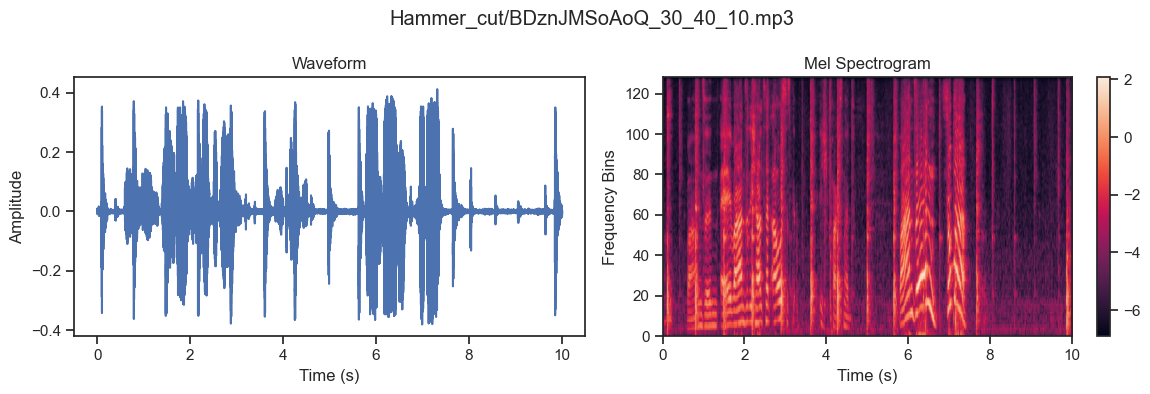

In [17]:
def plot_audio(mp3_path: str) -> None:
    """ 
    Using matplotlib and create_mel_spectrogram() write a function that takes a mp3_path and plots
    both the waveform (line plot of amplitudes) and the mel-spectrogram side-by-side as subplots.
    
    Use the path as a single main title for both subplots
    """

    # TODO
    # Check if file exists first
    if not os.path.exists(mp3_path):
        print(f"Error: File '{mp3_path}' not found.")
        return
    
    try:
        # Load audio for waveform
        audio, sr = librosa.load(mp3_path, sr=sample_rate)
        
        # Create mel spectrogram
        mel_spec = create_mel_spectrogram(mp3_path)
        
        if mel_spec.size == 0:
            return
            
        # Create figure with subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        
        # Plot waveform
        time_axis = np.linspace(0, len(audio) / sr, num=len(audio))
        ax1.plot(time_axis, audio)
        ax1.set_title('Waveform')
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Amplitude')
        
        # Plot mel spectrogram
        img = ax2.imshow(mel_spec, aspect='auto', origin='lower', 
                         extent=[0, len(audio)/sr, 0, mel_spec.shape[0]])
        ax2.set_title('Mel Spectrogram')
        ax2.set_xlabel('Time (s)')
        ax2.set_ylabel('Frequency Bins')
        plt.colorbar(img, ax=ax2)
        
        # Set main title
        plt.suptitle(mp3_path)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error plotting audio: {e}")

# Test the function with the files you have
for audio_file in available_files:
    if os.path.exists(audio_file):
        print(f"Plotting: {audio_file}")
        plot_audio(audio_file)
        break